<a href="https://colab.research.google.com/github/KrishChothani/Computer-Vision-Using-Deep-Learning/blob/main/Pract1_cvdl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

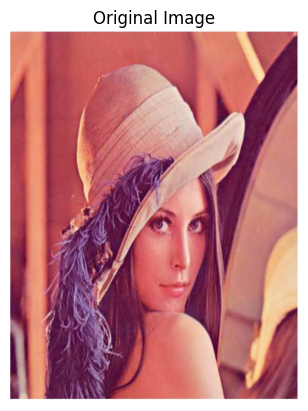

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('/content/Lena.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

new_h, new_w = img.shape[0]*2 , img.shape[1]*2

plt.imshow(img)
plt.title("Original Image")
plt.axis('off')
plt.show()


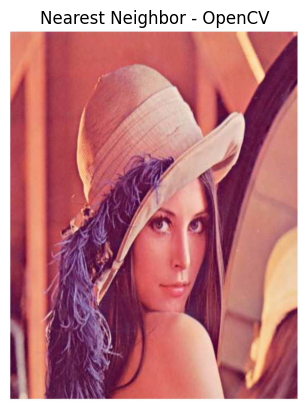

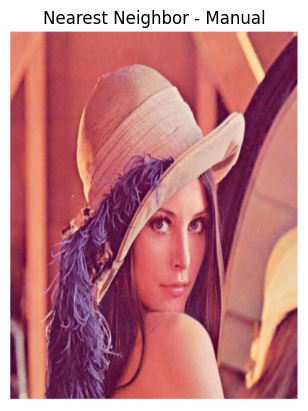

In [3]:
resize_opencv = cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_NEAREST)
# interpolation_opencv = cv2.cvtColor(interpolation_opencv, cv2.COLOR_BGR2RGB)

plt.imshow(resize_opencv)
plt.title("Nearest Neighbor - OpenCV")
plt.axis('off')
plt.show()

def resize_nearest(img, scale_factor):
  h , w = img.shape[:2]
  orig_height, orig_width = img.shape[:2]
  new_height, new_width = int(orig_height * scale_factor), int(orig_width * scale_factor)

  new_img = np.zeros((new_height, new_width, img.shape[2]), dtype=img.dtype)

  for i in range(new_height):
        for j in range(new_width):
            orig_x = int(i / scale_factor)
            orig_y = int(j / scale_factor)
            new_img[i,j] = img[orig_x , orig_y]
  return new_img


resize_manual = resize_nearest(img, 5)
plt.imshow(resize_opencv)
plt.title("Nearest Neighbor - Manual")
plt.axis('off')
plt.show()


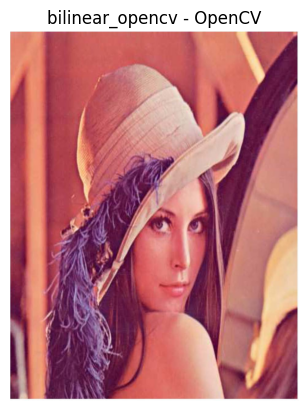

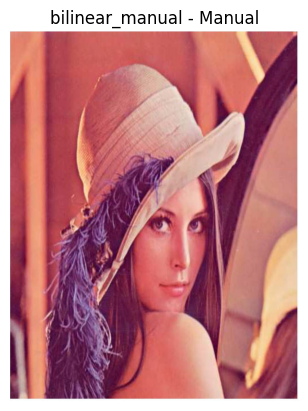

In [ ]:
bilinear_opencv = cv2.resize(img,(new_w, new_h), interpolation=cv2.INTER_LINEAR)

plt.imshow(bilinear_opencv)
plt.title("bilinear_opencv - OpenCV")
plt.axis('off')
plt.show()


def bilinear_interpolation(img, scale_factor):
    orig_height, orig_width = img.shape[:2]
    new_height, new_width = int(orig_height * scale_factor), int(orig_width * scale_factor)
    new_img = np.zeros((new_height, new_width, img.shape[2]), dtype=np.float32)



    for i in range(new_height):
        for j in range(new_width):
            x = i / scale_factor
            y = j / scale_factor

            x1, y1 = int(np.floor(x)), int(np.floor(y))
            x2, y2 = min(x1 + 1, orig_height - 1), min(y1 + 1, orig_width - 1)

            # Differences
            dx, dy = x - x1, y - y1

            # if i<5 and j<5  :
            #    print(x1,y1,x2,y2,dx,dy)

            # Pixel values of the four neighbors
            Q11 = img[x1, y1].astype(np.float32)
            Q21 = img[x2, y1].astype(np.float32)
            Q12 = img[x1, y2].astype(np.float32)
            Q22 = img[x2, y2].astype(np.float32)

            # Bilinear interpolation formula
            interpolated = (Q11 * (1 - dx) * (1 - dy) +
                            Q21 * dx * (1 - dy) +
                            Q12 * (1 - dx) * dy +
                            Q22 * dx * dy)

            new_img[i, j] = interpolated

    return new_img.astype(img.dtype)


bilinear_manual = bilinear_interpolation(img, 5)
plt.imshow(bilinear_manual)
plt.title("bilinear_manual - Manual")
plt.axis('off')
plt.show()



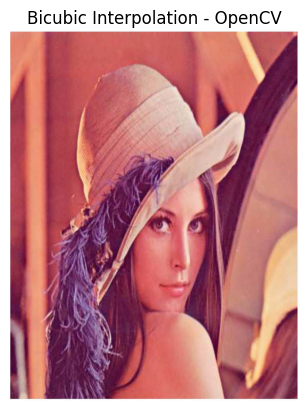

/tmp/ipython-input-8-3238299466.py:11: RuntimeWarning: overflow encountered in scalar multiply
  (p0 - 2.5 * p1 + 2 * p2 - 0.5 * p3) * t ** 2 +


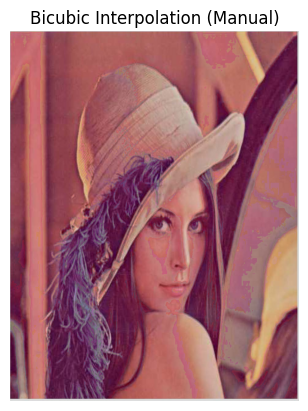

In [ ]:
cubic_opencv = cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_CUBIC)

plt.imshow(cubic_opencv)
plt.title("Bicubic Interpolation - OpenCV")
plt.axis('off')
plt.show()

def cubic_interpolate(p0, p1, p2, p3, t):
    return (
        (-0.5 * p0 + 1.5 * p1 - 1.5 * p2 + 0.5 * p3) * t ** 3 +
        (p0 - 2.5 * p1 + 2 * p2 - 0.5 * p3) * t ** 2 +
        (-0.5 * p0 + 0.5 * p2) * t +
        p1
    )

def resize_bicubic(img, new_h, new_w):
    h, w = img.shape[:2]
    output = np.zeros((new_h, new_w, 3), dtype=np.uint8)
    for i in range(new_h):
        for j in range(new_w):
            y = i * h / new_h
            x = j * w / new_w

            x_int = int(x)
            y_int = int(y)

            dx = x - x_int
            dy = y - y_int

            for c in range(3):
                pixels = []
                for m in range(-1, 3):
                    row = []
                    for n in range(-1, 3):
                        xi = min(max(x_int + n, 0), w - 1)
                        yi = min(max(y_int + m, 0), h - 1)
                        row.append(img[yi, xi, c])
                    col = cubic_interpolate(*row, dx)
                    pixels.append(col)
                value = cubic_interpolate(*pixels, dy)
                output[i, j, c] = np.clip(value, 0, 255)
    return output

manual_bc = resize_bicubic(img, new_h, new_w)

plt.imshow(manual_bc)
plt.title("Bicubic Interpolation (Manual)")
plt.axis('off')
plt.show()





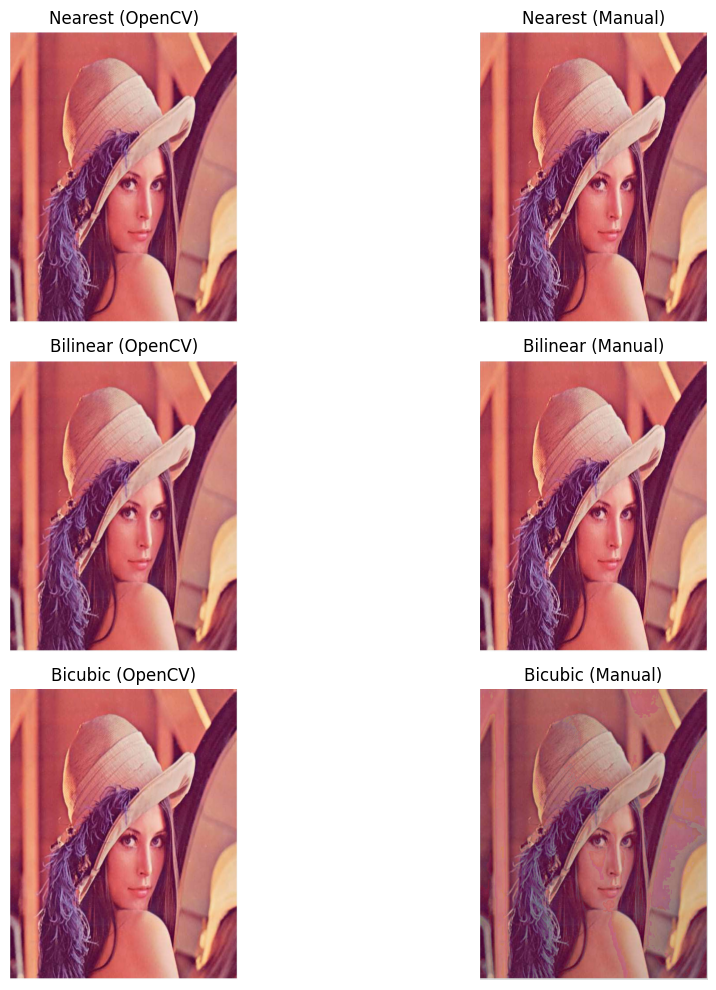

In [ ]:
titles = ["Nearest (OpenCV)", "Nearest (Manual)",
          "Bilinear (OpenCV)", "Bilinear (Manual)",
          "Bicubic (OpenCV)", "Bicubic (Manual)"]


images = [resize_opencv, resize_manual,
          bilinear_opencv, bilinear_manual,
          cubic_opencv, manual_bc]

plt.figure(figsize=(12, 10))
for i in range(6):
    plt.subplot(3, 2, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

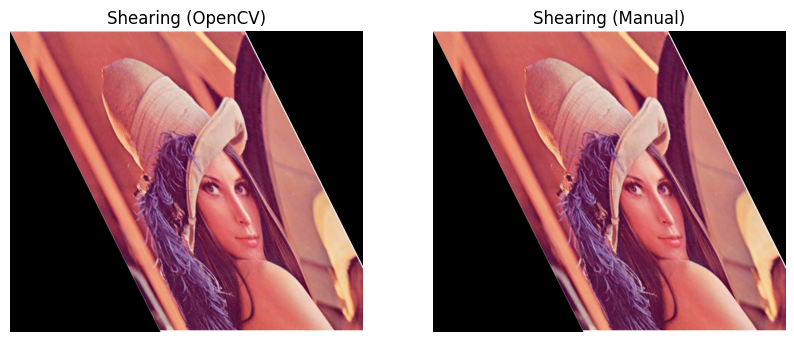

In [ ]:
# Shearing (X-direction)
rows, cols, _ = img.shape

# OpenCV Affine Shear
M = np.float32([[1, 0.5, 0],
                [0, 1,   0]])
shear_cv = cv2.warpAffine(img, M, (int(cols*1.5), rows))

# Manual Shear (X-direction)
shear_manual = np.zeros_like(shear_cv)
for y in range(rows):
    for x in range(cols):
        new_x = int(x + 0.5 * y)
        if new_x < shear_cv.shape[1]:
            shear_manual[y, new_x] = img[y, x]

# Display
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1), plt.imshow(shear_cv), plt.title("Shearing (OpenCV)"), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(shear_manual), plt.title("Shearing (Manual)"), plt.axis('off')
plt.show()

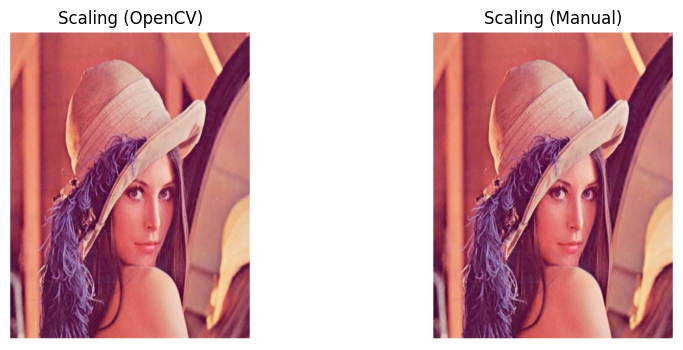

In [ ]:
#Scaling
# OpenCV Resize
scaled_cv = cv2.resize(img, (int(cols*1.5), int(rows*1.5)))

# Manual Nearest-Neighbor Scaling
new_h, new_w = int(rows * 1.5), int(cols * 1.5)
scaled_manual = np.zeros((new_h, new_w, 3), dtype=np.uint8)
for i in range(new_h):
    for j in range(new_w):
        y = int(i * rows / new_h)
        x = int(j * cols / new_w)
        scaled_manual[i, j] = img[y, x]

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1), plt.imshow(scaled_cv), plt.title("Scaling (OpenCV)"), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(scaled_manual), plt.title("Scaling (Manual)"), plt.axis('off')
plt.show()


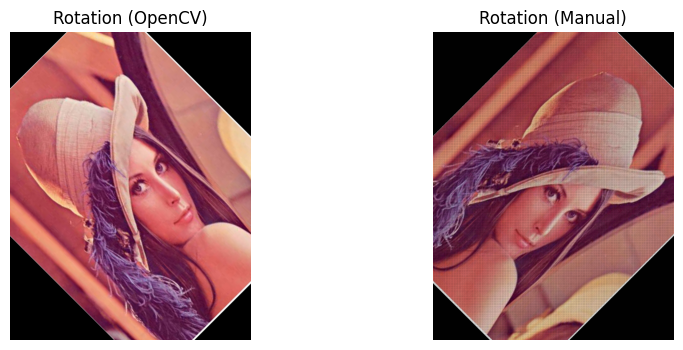

In [ ]:

#Rotation (45 degrees)
# rotation matrix = [cos@ , -sin@][x0]
 #                  [cos@ ,  sin@][y0]
# OpenCV Rotation
M = cv2.getRotationMatrix2D((cols//2, rows//2), 45, 1)
rotated_cv = cv2.warpAffine(img, M, (cols, rows))

# Manual Rotation (around center)
import math
angle = math.radians(45)
center_x, center_y = cols//2, rows//2
rotated_manual = np.ones_like(img)

for y in range(rows):
    for x in range(cols):
        x0 = x - center_x
        y0 = y - center_y
        xr = int(x0 * math.cos(angle) - y0 * math.sin(angle) + center_x)
        yr = int(x0 * math.sin(angle) + y0 * math.cos(angle) + center_y)
        if 0 <= xr < cols and 0 <= yr < rows:
            rotated_manual[yr, xr] = img[y, x]

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1), plt.imshow(rotated_cv), plt.title("Rotation (OpenCV)"), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(rotated_manual), plt.title("Rotation (Manual)"), plt.axis('off')
plt.show()


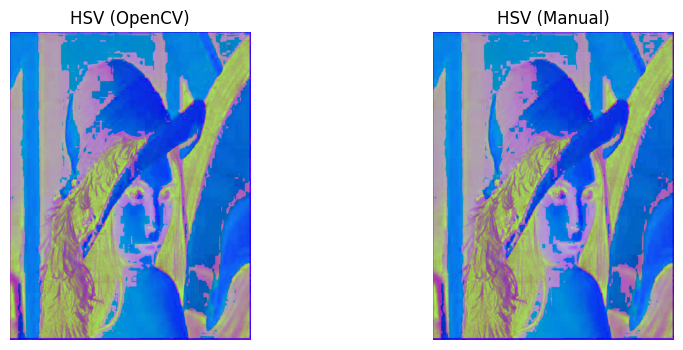

In [ ]:
# HSV / HSB Conversion
# OpenCV
hsv_cv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# Manual HSV
def rgb_to_hsv(r, g, b):
    r, g, b = r/255.0, g/255.0, b/255.0
    mx = max(r, g, b)
    mn = min(r, g, b)
    diff = mx - mn

    # Hue
    if diff == 0:
        h = 0
    elif mx == r:
        h = (60 * ((g - b)/diff) + 360) % 360
    elif mx == g:
        h = (60 * ((b - r)/diff) + 120) % 360
    else:
        h = (60 * ((r - g)/diff) + 240) % 360

    s = 0 if mx == 0 else diff / mx
    v = mx
    return int(h / 2), int(s * 255), int(v * 255)

hsv_manual = np.zeros_like(hsv_cv)
for y in range(rows):
    for x in range(cols):
        r, g, b = img[y, x]
        hsv_manual[y, x] = rgb_to_hsv(r, g, b)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1), plt.imshow(hsv_cv), plt.title("HSV (OpenCV)"), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(hsv_manual), plt.title("HSV (Manual)"), plt.axis('off')
plt.show()


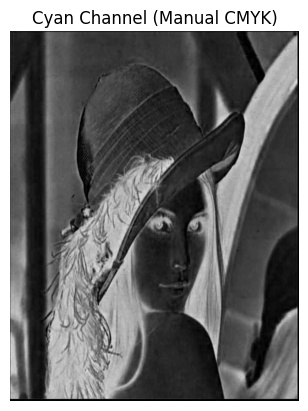

In [ ]:
#CMYK (No OpenCV Direct, Only Manual)
# Manual CMYK approximation (normalized)
cmyk_manual = np.zeros((rows, cols, 4), dtype=np.uint8)
for y in range(rows):
    for x in range(cols):
        r, g, b = img[y, x]
        if (r, g, b) == (0, 0, 0):
            c = m = yk = 0
            k = 255
        else:
            c = 255 - r
            m = 255 - g
            yk = 255 - b
            k = min(c, m, yk)
        cmyk_manual[y, x] = [c, m, yk, k]

# Display Cyan channel
plt.imshow(cmyk_manual[:, :, 0], cmap='gray')
plt.title("Cyan Channel (Manual CMYK)")
plt.axis('off')
plt.show()

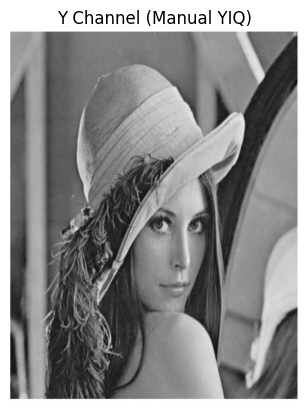

In [ ]:
#YIQ Conversion (Manual Only)
# Manual YIQ from RGB
yiq_manual = np.zeros((rows, cols, 3), dtype=np.float32)
for y in range(rows):
    for x in range(cols):
        r, g, b = img[y, x] / 255.0
        y_ = 0.299*r + 0.587*g + 0.114*b
        i_ = 0.596*r - 0.274*g - 0.322*b
        q_ = 0.211*r - 0.523*g + 0.312*b
        yiq_manual[y, x] = [y_, i_, q_]

# Display Y channel
plt.imshow(yiq_manual[:, :, 0], cmap='gray')
plt.title("Y Channel (Manual YIQ)")
plt.axis('off')
plt.show()
